In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test.csv')
df

1                                 mens ultrasheer  \
0       4                         Surprisingly delightful   
1       2                    Works, but not as advertised   
2       2                                         Oh dear   
3       2                                 Incorrect disc!   
4       2                                  Incorrect Disc   
...    ..                                             ...   
649994  5                                    Pretty Cool!   
649995  5                                        great cd   
649996  2  An interesting look into Boston's comedy clubs   
649997  5                      Du vol...pour les cowboys!   
649998  4      A Companion Read To GUNS, GERMS, AND STEEL   

       This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!  
0       This is a fast read filled with unexpected hum...                                                                                                                                                                                                                                                                                                                                                            
1       I bought one of these chargers..the instructio...                                                                                                                                                                                                                                                                                                                                                            
2       I was excited to find a book ostensibly about ...                                                                                                                                                                                                                                                                                                                                                            
3       I am a big JVC fan, but I do not like this mod...                                                                                                                                                                                                                                                                                                                                                            
4       I love the style of this, but after a couple y...                                                                                                                                                                                                                                                                                                                                                            
...                                                   ...                                                                                                                                                                                                                                                                                                                                                            
649994  We got it for our mom's birthday. She LOVES it...                                                                                                                                                                                                                                                                                                                                                            
649995  this cd is very goo

In [3]:
df['label'] = df['1']
df['text'] = df['This model may be ok for sedentary types, but I\'m active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!']
df = df.drop(['1','mens ultrasheer', 'This model may be ok for sedentary types, but I\'m active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!'], axis = 1)
df = df[0:200]
print(f'Dataset size is: {len(df)} Rows, {len(df.columns)} Columns')
print(f'Columns are:{df.columns}')
df

Dataset size is: 200 Rows, 2 Columns
Columns are:Index(['label', 'text'], dtype='object')


label                                               text
0        4  This is a fast read filled with unexpected hum...
1        2  I bought one of these chargers..the instructio...
2        2  I was excited to find a book ostensibly about ...
3        2  I am a big JVC fan, but I do not like this mod...
4        2  I love the style of this, but after a couple y...
..     ...                                                ...
195      1  "Spinout" (1966) represents the nadir of Elvis...
196      2  This is not Presley's best vehicle but by this...
197      5  I love this desk! In fact, I have two! One for...
198      1  This one makes too small and too fine a grind ...
199      4  I am satisfied with this product. I can stick ...

[200 rows x 2 columns]

In [4]:
import re
import string
import spacy
import nltk
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwordf = nltk.corpus.stopwords.words('english')

tokenizer = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = text.lower()  # Convert text to lower case
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation marks
    return text

def get_tokens(text):
    tokens = tokenizer(text)  # tokenization
    tokens = [i for i in tokens if str(i) not in stopwordf]  # removing stop wordf
    tokens = [wordnet_lemmatizer.lemmatize(str(i)) for i in tokens]  # lemmatize
    return tokens

df.loc[:, 'text'] = df['text'].apply(preprocess_text)
df.loc[:, 'tokens'] = df['text'].apply(get_tokens)
df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Art\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Art\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Art\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


label                                               text  \
0      4  this is a fast read filled with unexpected hum...   
1      2  i bought one of these chargersthe instructions...   
2      2  i was excited to find a book ostensibly about ...   
3      2  i am a big jvc fan but i do not like this mode...   
4      2  i love the style of this but after a couple ye...   

                                              tokens  
0  [fast, read, filled, unexpected, humour, profo...  
1  [bought, one, chargersthe, instruction, say, l...  
2  [excited, find, book, ostensibly, muslim, femi...  
3  [big, jvc, fan, like, model, suspiscious, saw,...  
4  [love, style, couple, year, dvd, giving, probl...

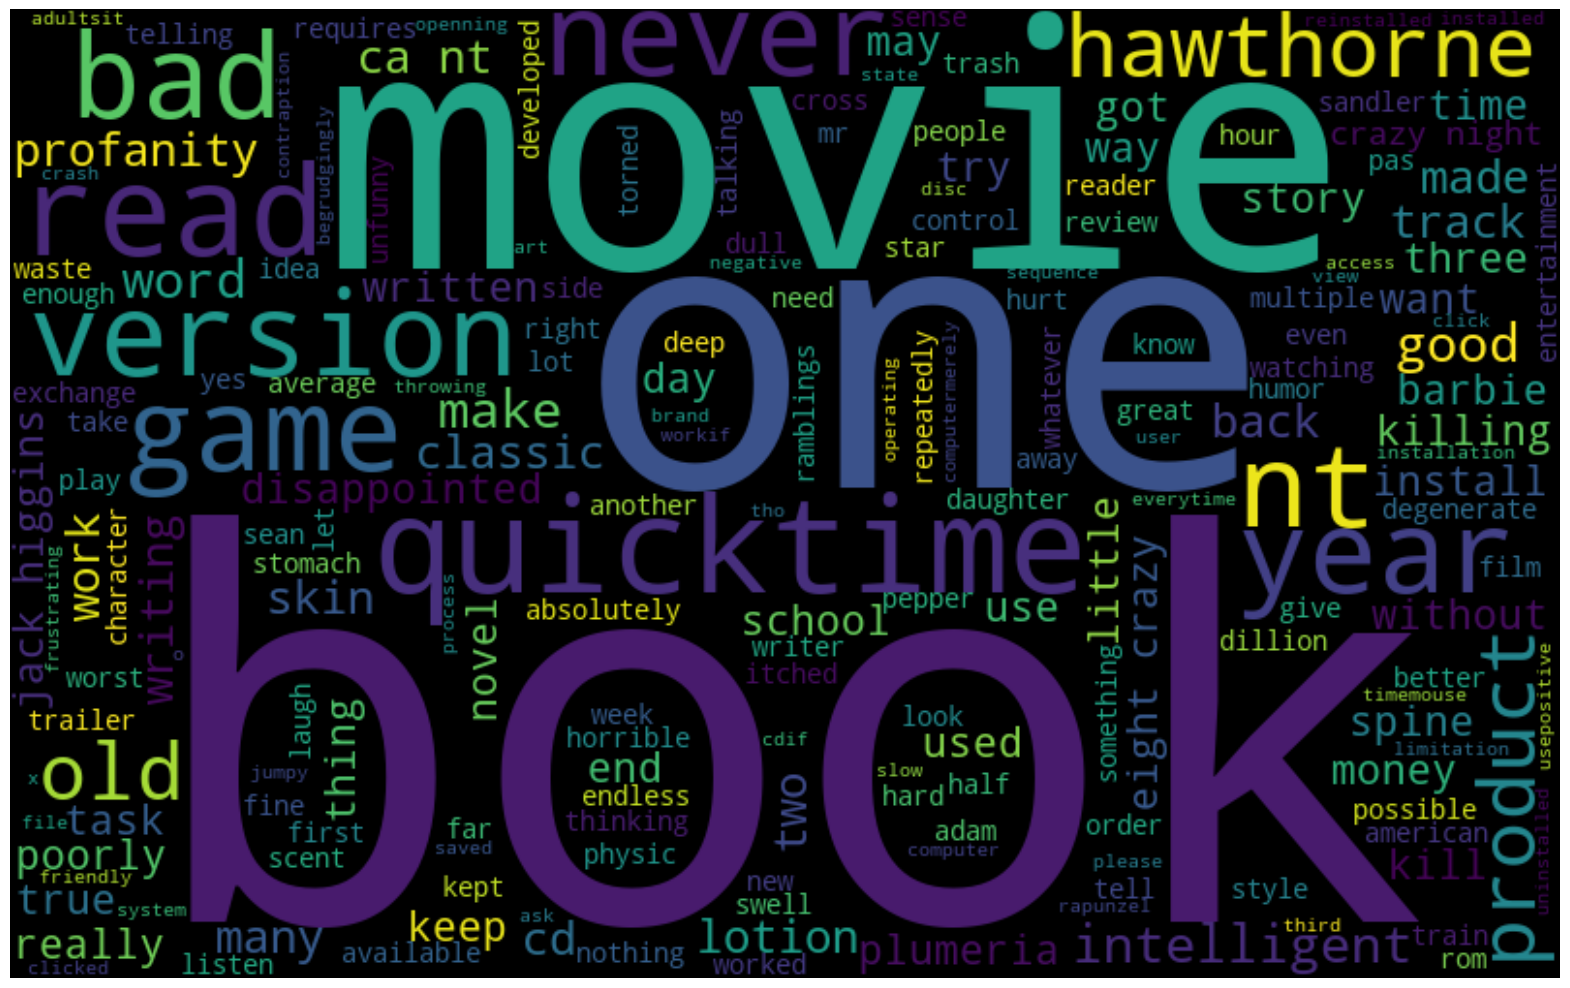

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

label_1_words_list = sum([list(tokens) for tokens in df[df['label'] == 1]['tokens']], [])
label_2_words_list = sum([list(tokens) for tokens in df[df['label'] == 2]['tokens']], [])
label_4_words_list = sum([list(tokens) for tokens in df[df['label'] == 4]['tokens']], [])
label_5_words_list = sum([list(tokens) for tokens in df[df['label'] == 5]['tokens']], [])

wordcloud = WordCloud(width=800, height=500).generate(" ".join(label_1_words_list))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

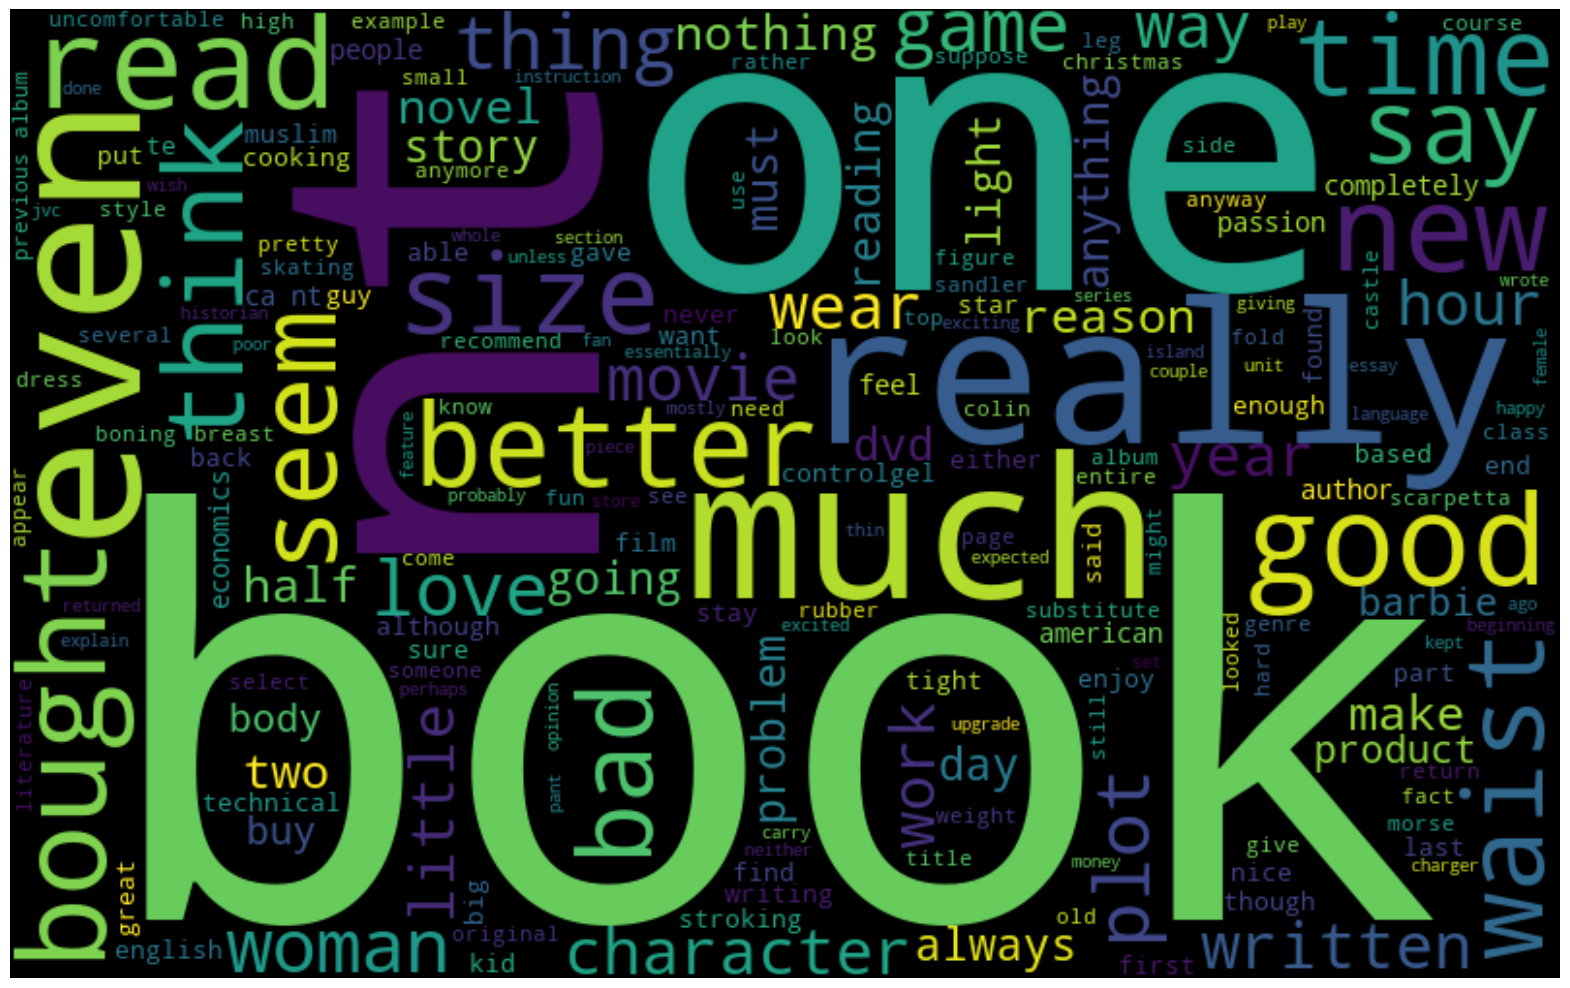

In [9]:
wordcloud = WordCloud(width=800, height=500).generate(" ".join(label_2_words_list))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [11]:
wordcloud = WordCloud(width=800, height=500).generate(" ".join(label_4_words_list))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

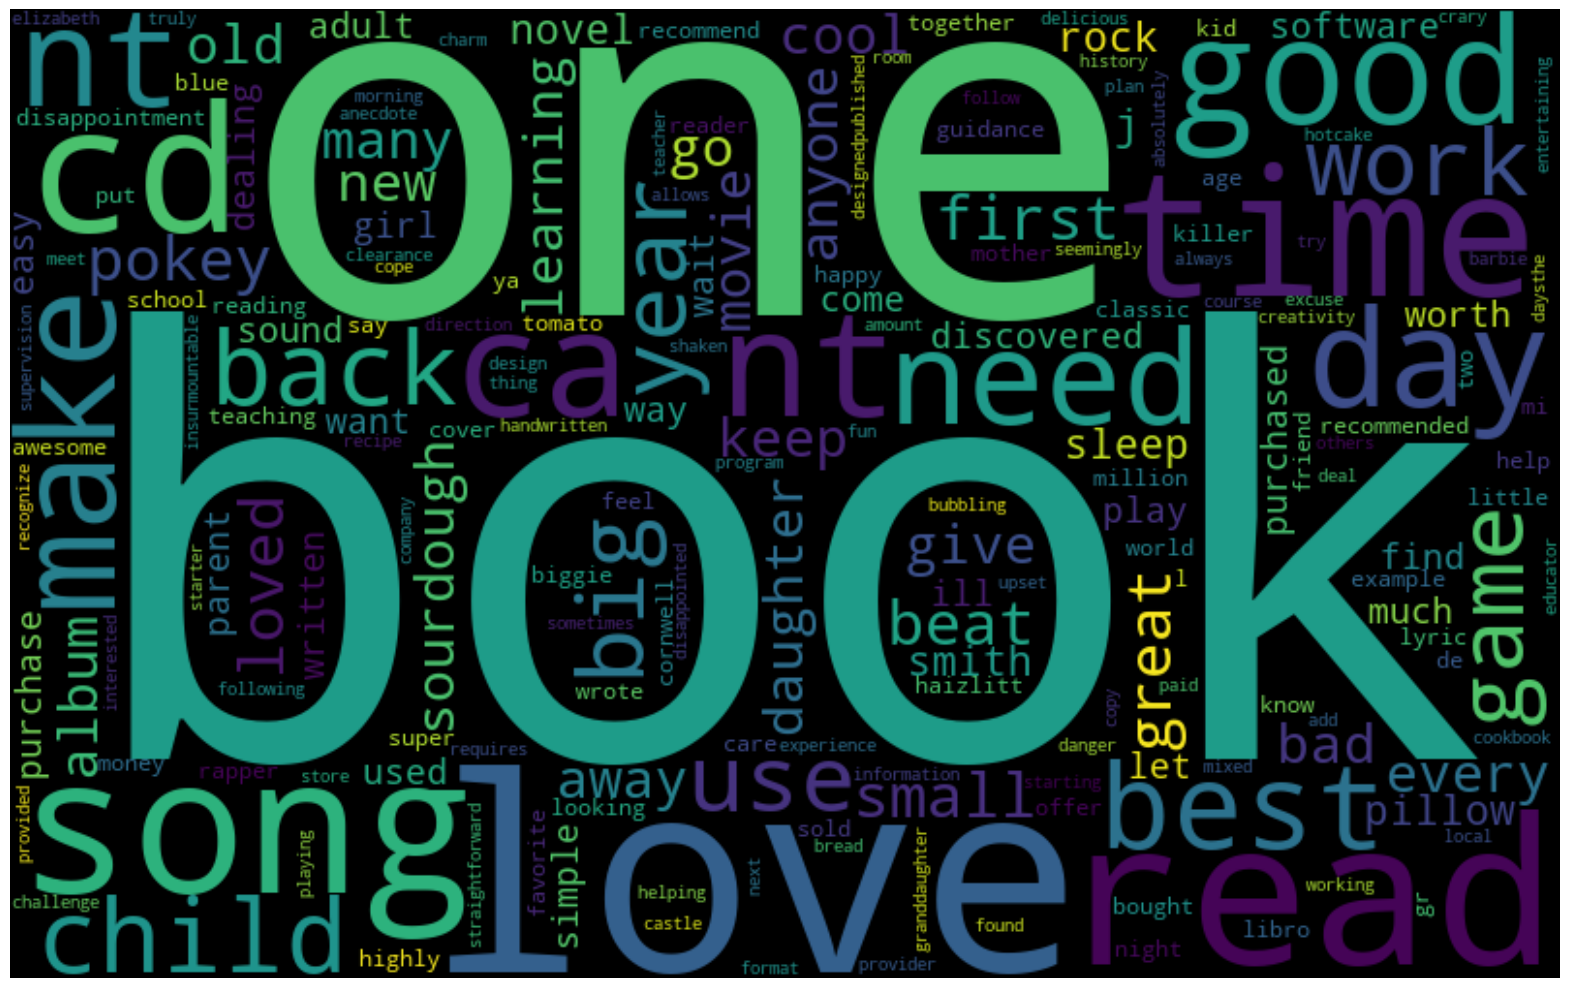

In [12]:
wordcloud = WordCloud(width=800, height=500).generate(" ".join(label_5_words_list))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()